# Import các libraries cần thiết và load data

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import random
random.seed(0) # please do not remove this line

iris = np.genfromtxt('iris_1D.csv', dtype=None, delimiter=',', skip_header=1) 
X_data = iris[:, :1]
y_data = iris[:, 1]

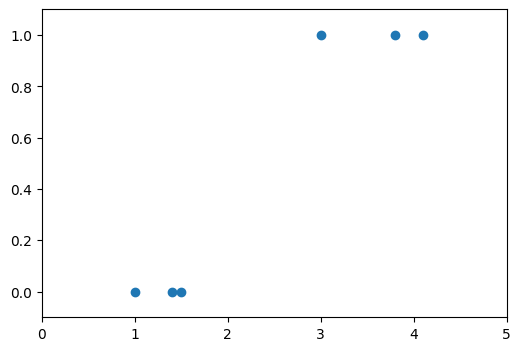

In [12]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_ylim((-0.1, 1.1))
ax.set_xlim((0, 5))

plt.scatter(X_data[:,0], y_data)    
plt.show()

In [13]:
intercept = np.ones((X_data.shape[0], 1))
X_data = np.concatenate((intercept, X_data), axis=1)

print(X_data, X_data.shape)
print(y_data, y_data.shape)

[[1.  1.4]
 [1.  1. ]
 [1.  1.5]
 [1.  3. ]
 [1.  3.8]
 [1.  4.1]] (6, 2)
[0. 0. 0. 1. 1. 1.] (6,)


# Huấn luyện và nhận định

In [14]:
# parameters
n = 2                  # size of individual (chromosome)
m = 100                # size of population
n_generations = 100    # number of generations

# bound [-10, 10]
# crossover_rate = 0.9
# mutation_rate = 0.05

losses = []            # để vẽ biểu đồ quá trình tối ưu
thetas = []

In [15]:
def sigmoid_function(z):
    # compute sigmoid
    return 1 / (1 + np.exp(-z))

def predict(X, theta):    
    # compute output
    y_hat = sigmoid_function(np.dot(X, theta))
    return y_hat

def loss_function(y_hat, y):
    y_hat = np.clip(y_hat, 1e-7, 1 - 1e-7)
    return (-y*np.log(y_hat) - (1-y)*np.log(1-y_hat)).mean()
    
def generate_random_value(bound = 20):
    return (random.random()-0.5)*bound

def compute_loss(individual):
    theta = np.array(individual)
    y_hat = predict(X_data, theta)
    loss = loss_function(y_hat, y_data)   
    
    return loss

def compute_fitness(individual):
    loss = compute_loss(individual)
    fitness = 1 / (loss + 1)
    return fitness

def create_individual():
    return [generate_random_value() for _ in range(n)]

def crossover(individual1, individual2, crossover_rate = 0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()
    
    for i in range(n):
        if random.random() < crossover_rate:
            individual1_new[i] = individual2[i]
            individual2_new[i] = individual1[i]            
    
    return individual1_new, individual2_new

def mutate(individual, mutation_rate = 0.05):
    individual_m = individual.copy()
    
    for i in range(n):
        if random.random() < mutation_rate:
            individual_m[i] = generate_random_value()
        
    return individual_m

def selection(sorted_old_population):    
    index1 = random.randint(0, m-1)
    index2 = random.randint(0, m-1)
    
    while index2 == index1:
        index2 = random.randint(0, m-1)
            
    individual_s = sorted_old_population[index1]
    if index2 > index1:
        individual_s = sorted_old_population[index2]
    
    return individual_s 

In [16]:
##### algorithm
# create initial population
population = [create_individual() for _ in range(m)]

#==== loops
elitism = 2
for i in range(n_generations):
    sorted_population = sorted(population, key=compute_fitness)
        
    if i%1 == 0:
        # lưu lại để vẽ tối ưu
        losses.append(compute_loss(sorted_population[m-1])) 
        print("Best loss:", compute_loss(sorted_population[m-1]), sorted_population[m-1])
        
    # lưu lại để tính predict
    thetas.append(sorted_population[m-1])   
    
    # create new_population
    new_population = sorted_population[-elitism:] 
    
    while len(new_population) < m:
        # selection
        individual_s1 = selection(sorted_population)
        individual_s2 = selection(sorted_population) # duplication
        
        # crossover
        individual_c1, individual_c2 = crossover(individual_s1, individual_s2)
        
        # mutation
        individual_m1 = mutate(individual_c1)
        individual_m2 = mutate(individual_c2)
        
        new_population.append(individual_m1)
        new_population.append(individual_m2)            
            
    # update population
    population = new_population

Best loss: 0.03832690583146505 [-8.838981123470028, 3.5240356859875654]
Best loss: 0.03832690583146505 [-8.838981123470028, 3.5240356859875654]
Best loss: 0.03520207177227985 [-7.818843081377926, 3.5240356859875654]
Best loss: 0.03520207177227985 [-7.818843081377926, 3.5240356859875654]
Best loss: 0.03520207177227985 [-7.818843081377926, 3.5240356859875654]
Best loss: 0.03520207177227985 [-7.818843081377926, 3.5240356859875654]
Best loss: 0.03520207177227985 [-7.818843081377926, 3.5240356859875654]
Best loss: 0.03324714783291214 [-7.981575176220668, 3.5745201721451014]
Best loss: 0.03324714783291214 [-7.981575176220668, 3.5745201721451014]
Best loss: 0.03324714783291214 [-7.981575176220668, 3.5745201721451014]
Best loss: 0.03324714783291214 [-7.981575176220668, 3.5745201721451014]
Best loss: 0.03324714783291214 [-7.981575176220668, 3.5745201721451014]
Best loss: 0.03324714783291214 [-7.981575176220668, 3.5745201721451014]
Best loss: 0.03218962270545888 [-8.57397218356484, 3.57452017214

In [17]:
# Best loss after 1 generation (n_generations = 1): 0.03832

In [18]:
# best solution after 100 generations (n_generations = 100): [-9.952862010355512, 4.535870941189593]



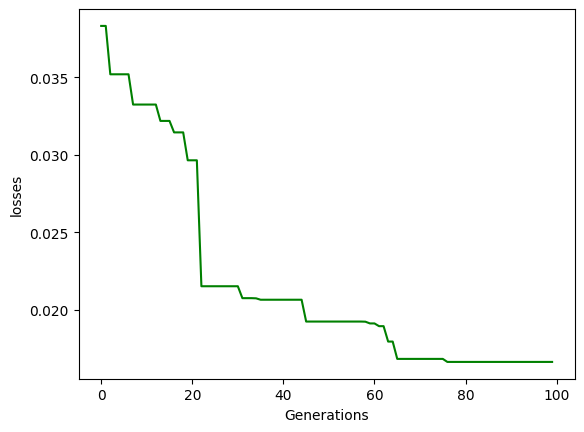

In [19]:
import matplotlib.pyplot as plt

plt.plot(losses, c='green')
plt.xlabel('Generations')
plt.ylabel('losses')
plt.show()

[-9.952862010355512, 4.535870941189593]


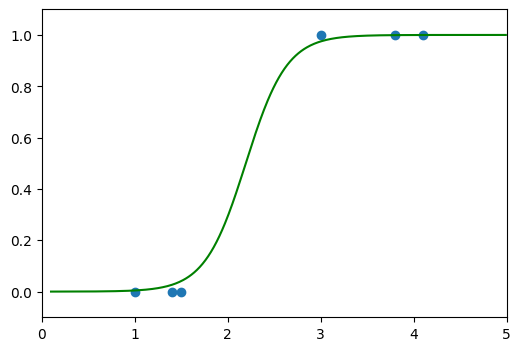

In [20]:
# Visualize predict & ground truth value

sorted_population = sorted(population, key=compute_fitness)
print(sorted_population[-1])
theta = np.array(sorted_population[-1])

fig, ax = plt.subplots(figsize=(6, 4))
ax.set_ylim((-0.1, 1.1))
ax.set_xlim((0, 5))

# plot data
plt.scatter(X_data[:,1], y_data)    

# sigmoid
x_values = np.arange(0.1, 5, 0.01)  # Tạo dữ liệu để test
x_values = x_values.reshape(x_values.shape[0], 1)
intercept = np.ones((x_values.shape[0], 1))
x_values  = np.concatenate((intercept, x_values), axis=1)
y_values  = predict(x_values, theta)
plt.plot(x_values[:, 1], y_values,c='green')

plt.show()